# Regression Model Validaties

### Linear Regression models validaties
Voor de (linear)regression models heb je gezien dat o.a. R<sup>2</sup> en RMSE, statistieken zijn om het model te evalueren.

### Classificatie Regression models validaties
Uit de (theorie)slides blijkt ook dat er diverse (statistische) technieken zijn om een **classificatie model**, zoals `LogisticRegression`, te valideren, oftewel "hoe goed het is".

Classificatieproblemen zijn een veel voorkomende type machine learning probleem en als zodanig is er een groot aantal statistieken die kunnen worden gebruikt om voorspellingen voor deze problemen te evalueren.

In deze notebook zullen we bekijken hoe je de volgende statistieken kunt gebruiken:

- Classificatienauwkeurigheid.
- Gebied onder ROC-curve.
- Confusion matrix.
- Classificatierapport.

### Dataset
De dataset die gebruikt wordt in de voorbeelden is de [Pime Indians Diabetes dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). Deze dataset is oorspronkelijk afkomstig van het National Institute of Diabetes and Digestive and Kidney Diseases. 

Het doel van de dataset is om diagnostisch te voorspellen of een patiënt diabetes heeft of niet, op basis van bepaalde diagnostische metingen, die in de dataset zijn opgenomen. Een typisch geval van een classificatie probleem.

File `pima-indians-diabetes.csv` in folder `data`.

### Wat ga je doen?
Doorloop en voeruit (*Run* of *Shift+Enter*) de Python voorbeelden en doe de opdrachten. Kijk niet te snel naar voorbeeldoplossingen, maar probeer eerst het zelf of met je team.

### Vervolg
Verwerk diverse model validaties in jullie casus uitwerking. Probeer het zo visueel mogelijk.

---

In [1]:
%matplotlib inline

import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

# Increase font size for plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# helper functions
def load_csv_pd_data(path, filename, names=None):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel CSV-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    # DEBUG: print(xls_path)
    return pd.read_csv(filepath_or_buffer=csv_path, names=names)

###  Classificatienauwkeurigheid.

De nauwkeurigheid van de classificatie is het aantal juiste voorspellingen dat is gedaan als een verhouding van alle gedane voorspellingen. 

Dit is de meest gebruikte evaluatiemaatstaf voor classificatieproblemen, maar ook de meest misbruikte. 

Het is eigenlijk alleen geschikt als er in elke klas evenveel waarnemingen zijn (wat zelden het geval is) en dat alle voorspellingen en voorspellingsfouten even belangrijk zijn, wat vaak niet het geval is.

Hieronder zie je een voorbeeld van het berekenen van de nauwkeurigheid van de classificatie.

In [2]:
# Cross Validation Classification Accuracy

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# column names - not included in CSV!
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 

# load dataset
dataframe = load_csv_pd_data("./data/", 'pima-indians-diabetes.csv')

# construct features X and target Y
#ORG: array = dataframe.values
array = dataframe.to_numpy()
X = array[:,0:8]
Y = array[:,8]

# K-Folds cross-validator: biedt train/test indices
# om de dataset in train/test sets te splitsen. 
# Gegevensset splitsen in k opeenvolgende `folds`
# (met of zonder shuffelen).
# Elke `fold` wordt dan één keer gebruikt als validatie,
# terwijl de k - 1 resterende `folds` de trainingsset vormen.
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# ML-model: classificatiemodel
model = LogisticRegression(solver='liblinear')

# cross-validation with accuracy score
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(f"Accuracy: {results.mean():0.3f} ({results.std():.3f})")

Accuracy: 0.771 (0.067)


Je kunt zien dat aandeel wordt getoond (±0.769). Dit kan worden omgezet in een percentage door de waarde met 100 te vermenigvuldigen, wat een nauwkeurigheidsscore van  ±77% nauwkeurig oplevert.

### Oefening

Experimenteer met de hyperparameters van `LogicRegression` m.n. diverse `solver` waarden. Kijk wat het oplevert en ook zul je zien dat je soms meerdere hyperparameters moet instellen of veranderen, of, data moet schalen, bijv. met `StandardScaler` uit scikit-learn, of, dat het algorithm voor de optimalisatie  (`solver`) niet (goed) werkt.

NB. Doelstelling is dat je beschikbare help-informatie opzoekt (contextual help of online [Scikit-learn](https://scikit-learn.org/stable/)) waarmee je enigszins inzicht krijgt over de werking van het model. Hier is géén VOORBEELD-OPLOSSING voor, het is experimenteren.

---

### Gebied onder ROC-curve.

Gebied onder ROC Curve (of kortweg ROC AUC) is een prestatiemaatstaf voor binaire classificatieproblemen.

De AUC vertegenwoordigt het vermogen van een model om onderscheid te maken tussen positieve en negatieve klassen. 

Een oppervlakte van 1.0 vertegenwoordigt een model dat alle voorspellingen perfect heeft gedaan. Een oppervlakte van 0.5 vertegenwoordigt een model dat zo goed als willekeurig is. 

Een ROC-curve is een grafiek van het werkelijk positieve percentage en het fout-positieve percentage voor een gegeven set waarschijnlijkheidsvoorspellingen bij verschillende drempels die worden gebruikt om de waarschijnlijkheden toe te wijzen aan klasselabels.

Het gebied onder de curve is dan bij benadering de integraal onder de ROC-curve. Het onderstaande voorbeeld geeft een demonstratie van het berekenen van de ROC AUC.

In [3]:
# Cross Validation Classification ROC AUC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# column names - not included in CSV!
# Dus names bevat de kolomnamen van de dataset.
# load_csv_pd_data() leest de CSV als een pandas DataFrame. Zorg dat de functie correct is geïmplementeerd om data in te lezen.
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 

# load dataset
dataframe = load_csv_pd_data(
    path="./data/", 
    filename='pima-indians-diabetes.csv',
    names=names
)

# bekijk het dataframe
dataframe.info()

# construct features X and target Y
# X: bevat de invoerfeatures zoals leeftijd, bloeddruk, BMI, etc.
# Y: bevat de doelklasse (diabetes aanwezig = 1, geen diabetes = 0).
array = dataframe.to_numpy()
X = array[:,0:8] # De eerste 8 kolommen zijn features.
Y = array[:,8] # De laatste kolom is de doelvariabele (0 of 1, diabetes).

# K-Folds cross validator
# Verdeelt de data in 10 gelijke delen (folds). Bij elke iteratie wordt één deel gebruikt als validatieset en de rest als trainingsset.
# random_state=7 zorgt voor reproduceerbaarheid.
# shuffle=True schudt de data om biases te minimaliseren.
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# ML-model: classificatiemodel
# ogistische regressie is een lineair classificatiemodel, geschikt voor binaire classificatie.
# solver='liblinear' wordt aanbevolen voor kleine datasets zoals deze.
model = LogisticRegression(solver='liblinear')

# cross-validation with ROC-AUC score
# scoring='roc_auc' gebruikt de ROC-AUC-score als prestatiewaarde.
# cross_val_score berekent de score voor elke fold en retourneert een array met resultaten.
# scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 

# Gemiddelde AUC-score: geeft aan hoe goed het model presteert over alle folds.
# Standaarddeviatie: toont de spreiding van de scores tussen de folds.
print(f"AUC: {results.mean():0.3f} ({results.std():.3f})")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
AUC: 0.771 (0.051)


Je kunt zien dat de AUC relatief dicht bij 1 en groter dan 0.5 ligt, hetgeen wijst op enige vaardigheid van het model in de voorspellingen.

---

Laten we eens de ROC-curve van 1 "fold" tekenen

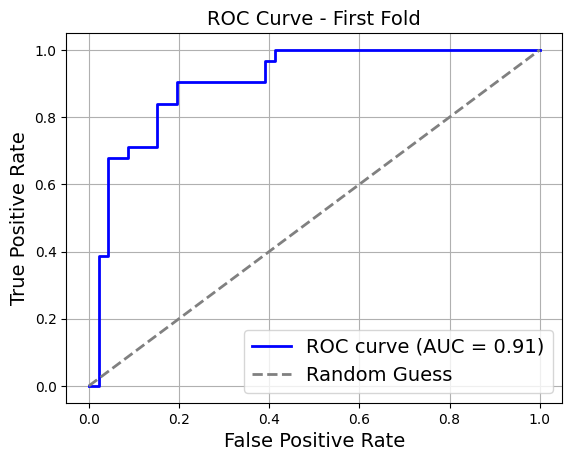

In [4]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.model_selection import KFold
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# 1. Data voorbereiden (gebruik de eerder gedefinieerde X en Y)
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')

# Selecteer de eerste fold
# Split Data: De next(kfold.split(X, Y)) geeft de indices voor de trainings- en testset van de eerste fold.
train_idx, test_idx = next(kfold.split(X, Y))
X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]

# 2. Model trainen
model.fit(X_train, Y_train)

# 3. Voorspelde waarschijnlijkheden (positieve klasse)
Y_proba = model.predict_proba(X_test)[:, 1]

# 4. Bereken ROC-curve en AUC
# roc_curve(Y_test, Y_proba) berekent de False Positive Rate (FPR), True Positive Rate (TPR) en thresholds.
# auc(fpr, tpr) berekent de AUC-score voor deze fold.
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
roc_auc = auc(fpr, tpr)

# 5. Plot de ROC-curve
# Je krijgt een grafiek waarin je de ROC-curve voor de eerste fold kunt zien. De AUC-score wordt vermeld in de legenda
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - First Fold")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Confusion matrix.

De confusion matrix (nederlands: 'verwarringsmatrix') is een handige presentatie van de nauwkeurigheid van een model met twee of meer klassen. 

De tabel geeft voorspellingen op de x-as (predicted) en echte uitkomsten op de y-as (actual). De cellen van de tabel zijn het aantal voorspellingen gemaakt door een machine learning-algoritme. 

Een algoritme voor machine learning kan bijvoorbeeld 0 of 1 voorspellen en elke voorspelling kan eigenlijk een 0 of 1 zijn geweest. Voorspellingen voor 0 die eigenlijk 0 waren, verschijnen in de cel voor voorspelling = 0 en actueel = 0, terwijl voorspellingen voor 0 die waren eigenlijk verschijnt 1 in de cel voor voorspelling = 0 en actueel = 1. En zo verder.

Hieronder zie je een voorbeeld van het berekenen van een confusion matrix.

NB. Het is in praktijk geen standaard de genoemde x-as (rijen) en y-as (kolommen) waarden. Check altijd wat de *predicted* en *actual* waarden zijn.

In [5]:
# Cross Validation Classification Confusion Matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# column names - not included in CSV!
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# load dataset
dataframe = load_csv_pd_data(
    path="./data/", 
    filename='pima-indians-diabetes.csv',
    names=names
)

# construct features X and target Y
# X: bevat de invoerfeatures zoals leeftijd, bloeddruk, BMI, etc.
# Y: bevat de doelklasse (diabetes aanwezig = 1, geen diabetes = 0).
array = dataframe.to_numpy()
X = array[:,0:8] # De eerste 8 kolommen zijn features.
Y = array[:,8] # De laatste kolom is de doelvariabele (0 of 1, diabetes).

# splits dataset in train/test data
# Splits de dataset in 67% training en 33% testdata.
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# classification model
model = LogisticRegression(solver='liblinear')
# train model
model.fit(X_train, Y_train)

# prediction
predicted = model.predict(X_test)

# calculate confusion matrix
# confusion_matrix vergelijkt de echte klassen (Y_test) met de voorspellingen (predicted) en retourneert een matrix.
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


De matrix heeft de vorm 

[[TN, FP],

 [FN, TP]]

- True Negatives (TN): Aantal correcte voorspellingen van de negatieve klasse.
- False Positives (FP): Aantal foutieve voorspellingen als positief, terwijl het negatief was.
- False Negatives (FN): Aantal foutieve voorspellingen als negatief, terwijl het positief was.
- True Positives (TP): Aantal correcte voorspellingen van de positieve klasse.

Hoewel de array zonder koppen is afgedrukt, kun je zien dat de meeste voorspellingen op de diagonale lijn van de matrix vallen (wat correcte voorspellingen zijn). Maar er zijn ook wat FP (false positives:39) en FN (false negatives:20).

Een aanvulling is om de accuracy, precision, recall en F1-score te berekenen.

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Bereken de metrics
accuracy = accuracy_score(Y_test, predicted)
precision = precision_score(Y_test, predicted)
recall = recall_score(Y_test, predicted)
f1 = f1_score(Y_test, predicted)

# Resultaten weergeven
print(f"Confusion Matrix:\n{matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Confusion Matrix:
[[141  21]
 [ 41  51]]
Accuracy: 0.756
Precision: 0.708
Recall: 0.554
F1 Score: 0.622


---
### Classificatierapport.

De `scikit-learn` bibliotheek biedt een classificatie rapport aan bij het werken aan classificatieproblemen om je snel een idee te geven van de nauwkeurigheid van een model met behulp van een aantal metingen. 

De `classification_report()` methode geeft de `precision`, `recall` en `F1-score` voor elke klasse weer. 

> Voor de begrippen `precision`, `recall` en `F1-score`: zie de slides van de theorie. 

Het onderstaande voorbeeld geeft een demonstratie hoe je het classificatierapport kan maken voor het binaire classificatieprobleem.

In [7]:
# Cross Validation Classification report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# column names - not included in CSV!
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# load dataset
dataframe = load_csv_pd_data(
    path="./data/", 
    filename='pima-indians-diabetes.csv',
    names=names
)

# construct features X and target Y
# not recommended anymore: array = dataframe.values
array = dataframe.to_numpy()
X = array[:,0:8]
Y = array[:,8]

# splits dataset in train/test data
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

# classification model
model = LogisticRegression(solver='liblinear')
# train model
model.fit(X_train, Y_train)

# prediction
predicted = model.predict(X_test)

# print clasification report
report = classification_report(Y_test, predicted) 
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



Je ziet een goede `precision` en `recal` voor het algoritme.

---

---